In [1]:
pip install ipynb

In [2]:
# pip install ipynb
# import ipynb
# this code need for use import funchion from file .ipynb

In [3]:
import pandas as pd
import os
import ipynb

In [4]:
# log into Google Disk for Google Colab/ if you use file on ssd on your computer, this code removes
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# set default folder for python
import sys
os.chdir('/content/drive/MyDrive/Colab Notebooks/')

Mounted at /content/drive


In [5]:
def load_best_result():
    data_result = pd.read_csv('result1.csv')
    data_result = data_result.drop(data_result.columns[[0]], axis=1)

    best_result = data_result.loc[data_result['Minimum_Validation_Loss'].idxmin()] # selection of the best result machine learning from a file by parameter Minimum_Validation_Loss
    return best_result

In [6]:
# search for the best parameter using a for
def use_ml(find_best_parameters,
           parametr_save, epochs,
           checkpoint_use,
           use_load_model,
           directory_model,
           directory_result,
           ):
  if find_best_parameters == True: # use this code when we need to find the best parameters
    for lstm in [200]:
      for dropout in [0.3, 0.2]:
        for dense in [512, 1024, 2000]:
          for batch_size in [250, 500]:
            for min_delta in [0.001]:
              best_model = predict_calculate(lstm,
                               dropout,
                               dense,
                               batch_size,
                               min_delta,
                               parametr_save, # If you need to save a machine learning model and calculation result choose True
                               epochs,
                               checkpoint_use, # If you need to use checkpoint save a machine learning model choose True
                               use_load_model,
                               directory_model,
                               directory_result,
                               ) # If you need to use load a machine learning model choose True
  else: # use this code when we need to load the best parameters
    if os.path.isfile('result1.csv') == True: # if is file in folder then we select best result
      best_result = load_best_result()
      lstm = best_result['LSTM']
      dropout = best_result['Dropout']
      dense = best_result['Dense']
      batch_size = best_result['Batch_size']
      min_delta = best_result['Min_delta']
      best_model = predict_calculate(lstm,
                               dropout,
                               dense,
                               batch_size,
                               min_delta,
                               parametr_save,
                               epochs,
                               checkpoint_use,
                               use_load_model,
                               directory_model,
                               directory_result,
                               )
    else:
      print('Could not find the file with the best results, change the parameter find_best_parameters on True')
    
    

In [7]:
from ipynb.fs.full.ML_1_0 import predict_calculate

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
directory_model = 'best_model_1' # adress directory load model machine learning
directory_result = 'result1.csv'
# you can use checpoint model for example training_step_1/cp-0024.ckpt

Epoch 1/300
21/21 [==============================] - 6s 87ms/step - loss: 0.8966 - val_loss: 0.5574
Epoch 2/300
21/21 [==============================] - 2s 70ms/step - loss: 0.5847 - val_loss: 0.3123
Epoch 3/300
21/21 [==============================] - 2s 67ms/step - loss: 0.4316 - val_loss: 0.2838
Epoch 4/300
21/21 [==============================] - 2s 66ms/step - loss: 0.3315 - val_loss: 0.3634
Epoch 5/300
21/21 [==============================] - 2s 66ms/step - loss: 0.2580 - val_loss: 0.0397
Epoch 6/300
21/21 [==============================] - 2s 66ms/step - loss: 0.2368 - val_loss: 0.2656
Epoch 7/300
21/21 [==============================] - 2s 66ms/step - loss: 0.1842 - val_loss: 0.4599
Epoch 8/300
21/21 [==============================] - 2s 65ms/step - loss: 0.1692 - val_loss: 0.1203
Epoch 9/300
21/21 [==============================] - 2s 64ms/step - loss: 0.1754 - val_loss: 0.2405
Epoch 10/300
21/21 [==============================] - 2s 66ms/step - loss: 0.1446 - val_loss: 0.5891

INFO:tensorflow:Assets written to: best_model_1/assets


INFO:tensorflow:Assets written to: best_model_1/assets


Epoch 1/300
10/10 [==============================] - 5s 208ms/step - loss: 1.1897 - val_loss: 0.5742
Epoch 2/300
10/10 [==============================] - 2s 168ms/step - loss: 0.7119 - val_loss: 0.3621
Epoch 3/300
10/10 [==============================] - 2s 167ms/step - loss: 0.6258 - val_loss: 0.3049
Epoch 4/300
10/10 [==============================] - 2s 167ms/step - loss: 0.5479 - val_loss: 0.8726
Epoch 5/300
10/10 [==============================] - 2s 168ms/step - loss: 0.4647 - val_loss: 1.1100
Epoch 6/300
10/10 [==============================] - 2s 167ms/step - loss: 0.3644 - val_loss: 0.8497
Epoch 7/300
10/10 [==============================] - 2s 171ms/step - loss: 0.3183 - val_loss: 0.5245
Epoch 8/300
10/10 [==============================] - 2s 169ms/step - loss: 0.3238 - val_loss: 0.0491
Epoch 9/300
10/10 [==============================] - 2s 173ms/step - loss: 0.2628 - val_loss: 0.8857
Epoch 10/300
10/10 [==============================] - 2s 171ms/step - loss: 0.2176 - val_lo

INFO:tensorflow:Assets written to: best_model_1/assets


INFO:tensorflow:Assets written to: best_model_1/assets


Epoch 1/300
21/21 [==============================] - 4s 85ms/step - loss: 0.9959 - val_loss: 0.1050
Epoch 2/300
21/21 [==============================] - 2s 67ms/step - loss: 0.5963 - val_loss: 0.6269
Epoch 3/300
21/21 [==============================] - 2s 66ms/step - loss: 0.4746 - val_loss: 0.2933
Epoch 4/300
21/21 [==============================] - 2s 67ms/step - loss: 0.5004 - val_loss: 0.3525
Epoch 5/300
21/21 [==============================] - 2s 63ms/step - loss: 0.3684 - val_loss: 0.0861
Epoch 6/300
21/21 [==============================] - 2s 67ms/step - loss: 0.2793 - val_loss: 0.0933
Epoch 7/300
21/21 [==============================] - 2s 69ms/step - loss: 0.2195 - val_loss: 0.5795
Epoch 8/300
21/21 [==============================] - 2s 67ms/step - loss: 0.1795 - val_loss: 0.3193
Epoch 9/300
21/21 [==============================] - 2s 68ms/step - loss: 0.1800 - val_loss: 0.0549
Epoch 10/300
21/21 [==============================] - 2s 68ms/step - loss: 0.1605 - val_loss: 0.3394

INFO:tensorflow:Assets written to: best_model_1/assets


INFO:tensorflow:Assets written to: best_model_1/assets


Epoch 1/300
10/10 [==============================] - 5s 208ms/step - loss: 2.0543 - val_loss: 0.2688
Epoch 2/300
10/10 [==============================] - 2s 170ms/step - loss: 0.7967 - val_loss: 0.0664
Epoch 3/300
10/10 [==============================] - 2s 170ms/step - loss: 0.5536 - val_loss: 0.4361
Epoch 4/300
10/10 [==============================] - 2s 171ms/step - loss: 0.4447 - val_loss: 0.0334
Epoch 5/300
10/10 [==============================] - 2s 171ms/step - loss: 0.3800 - val_loss: 0.7890
Epoch 6/300
10/10 [==============================] - 2s 170ms/step - loss: 0.4228 - val_loss: 0.3741
Epoch 7/300
10/10 [==============================] - 2s 171ms/step - loss: 0.3893 - val_loss: 0.6597
Epoch 8/300
10/10 [==============================] - 2s 171ms/step - loss: 0.3340 - val_loss: 0.7279
Epoch 9/300
10/10 [==============================] - 2s 176ms/step - loss: 0.2562 - val_loss: 1.6465
Epoch 10/300
10/10 [==============================] - 2s 174ms/step - loss: 0.2231 - val_lo

INFO:tensorflow:Assets written to: best_model_1/assets


INFO:tensorflow:Assets written to: best_model_1/assets


Epoch 1/300
21/21 [==============================] - 4s 91ms/step - loss: 2.0761 - val_loss: 1.3274
Epoch 2/300
21/21 [==============================] - 2s 71ms/step - loss: 0.5425 - val_loss: 0.8260
Epoch 3/300
21/21 [==============================] - 2s 70ms/step - loss: 0.4451 - val_loss: 0.5422
Epoch 4/300
21/21 [==============================] - 2s 73ms/step - loss: 0.4008 - val_loss: 0.2633
Epoch 5/300
21/21 [==============================] - 2s 71ms/step - loss: 0.3348 - val_loss: 0.2906
Epoch 6/300
21/21 [==============================] - 2s 71ms/step - loss: 0.4619 - val_loss: 0.7053
Epoch 7/300
21/21 [==============================] - 2s 73ms/step - loss: 0.3533 - val_loss: 1.1762
Epoch 8/300
21/21 [==============================] - 2s 72ms/step - loss: 0.2406 - val_loss: 2.0072
Epoch 9/300
21/21 [==============================] - 2s 71ms/step - loss: 0.2137 - val_loss: 2.3754
Epoch 10/300
21/21 [==============================] - 2s 71ms/step - loss: 0.2044 - val_loss: 1.4040

INFO:tensorflow:Assets written to: best_model_1/assets


INFO:tensorflow:Assets written to: best_model_1/assets


Epoch 1/300
10/10 [==============================] - 5s 215ms/step - loss: 3.7812 - val_loss: 0.2242
Epoch 2/300
10/10 [==============================] - 2s 176ms/step - loss: 0.7711 - val_loss: 1.1239
Epoch 3/300
10/10 [==============================] - 2s 179ms/step - loss: 0.5403 - val_loss: 0.4673
Epoch 4/300
10/10 [==============================] - 2s 177ms/step - loss: 0.5006 - val_loss: 1.3009
Epoch 5/300
10/10 [==============================] - 2s 178ms/step - loss: 0.4335 - val_loss: 1.6486
Epoch 6/300
10/10 [==============================] - 2s 180ms/step - loss: 0.3781 - val_loss: 0.3789
Epoch 7/300
10/10 [==============================] - 2s 177ms/step - loss: 0.3417 - val_loss: 0.6482
Epoch 8/300
10/10 [==============================] - 2s 180ms/step - loss: 0.3456 - val_loss: 0.7100
Epoch 9/300
10/10 [==============================] - 2s 184ms/step - loss: 0.2822 - val_loss: 1.1605
Epoch 10/300
10/10 [==============================] - 2s 178ms/step - loss: 0.2589 - val_lo

INFO:tensorflow:Assets written to: best_model_1/assets


INFO:tensorflow:Assets written to: best_model_1/assets


Epoch 1/300
21/21 [==============================] - 4s 90ms/step - loss: 0.8544 - val_loss: 0.1361
Epoch 2/300
21/21 [==============================] - 2s 70ms/step - loss: 0.5348 - val_loss: 0.2485
Epoch 3/300
21/21 [==============================] - 2s 69ms/step - loss: 0.4118 - val_loss: 0.3551
Epoch 4/300
21/21 [==============================] - 2s 72ms/step - loss: 0.3349 - val_loss: 0.1757
Epoch 5/300
21/21 [==============================] - 2s 68ms/step - loss: 0.2979 - val_loss: 0.0783
Epoch 6/300
21/21 [==============================] - 2s 66ms/step - loss: 0.2667 - val_loss: 0.1826
Epoch 7/300
21/21 [==============================] - 2s 68ms/step - loss: 0.2211 - val_loss: 0.5972
Epoch 8/300
21/21 [==============================] - 2s 65ms/step - loss: 0.1834 - val_loss: 0.0712
Epoch 9/300
21/21 [==============================] - 2s 68ms/step - loss: 0.2188 - val_loss: 0.3346
Epoch 10/300
21/21 [==============================] - 2s 68ms/step - loss: 0.1286 - val_loss: 1.0862

INFO:tensorflow:Assets written to: best_model_1/assets


INFO:tensorflow:Assets written to: best_model_1/assets


Epoch 1/300
10/10 [==============================] - 5s 205ms/step - loss: 1.1816 - val_loss: 0.5749
Epoch 2/300
10/10 [==============================] - 2s 167ms/step - loss: 0.6340 - val_loss: 0.3325
Epoch 3/300
10/10 [==============================] - 2s 166ms/step - loss: 0.5474 - val_loss: 0.0892
Epoch 4/300
10/10 [==============================] - 2s 167ms/step - loss: 0.4623 - val_loss: 0.1083
Epoch 5/300
10/10 [==============================] - 2s 169ms/step - loss: 0.4184 - val_loss: 0.5164
Epoch 6/300
10/10 [==============================] - 2s 168ms/step - loss: 0.3552 - val_loss: 0.8628
Epoch 7/300
10/10 [==============================] - 2s 169ms/step - loss: 0.3284 - val_loss: 0.9186
Epoch 8/300
10/10 [==============================] - 2s 170ms/step - loss: 0.3405 - val_loss: 0.7623
Epoch 9/300
10/10 [==============================] - 2s 170ms/step - loss: 0.2802 - val_loss: 0.4798
Epoch 10/300
10/10 [==============================] - 2s 170ms/step - loss: 0.2210 - val_lo

INFO:tensorflow:Assets written to: best_model_1/assets


INFO:tensorflow:Assets written to: best_model_1/assets


Epoch 1/300
21/21 [==============================] - 4s 89ms/step - loss: 1.4728 - val_loss: 0.3747
Epoch 2/300
21/21 [==============================] - 2s 68ms/step - loss: 0.4738 - val_loss: 0.4412
Epoch 3/300
21/21 [==============================] - 2s 69ms/step - loss: 0.4059 - val_loss: 0.4238
Epoch 4/300
21/21 [==============================] - 2s 68ms/step - loss: 0.3542 - val_loss: 0.1104
Epoch 5/300
21/21 [==============================] - 2s 69ms/step - loss: 0.3624 - val_loss: 0.4877
Epoch 6/300
21/21 [==============================] - 2s 67ms/step - loss: 0.3266 - val_loss: 0.0718
Epoch 7/300
21/21 [==============================] - 2s 66ms/step - loss: 0.2793 - val_loss: 0.0374
Epoch 8/300
21/21 [==============================] - 2s 68ms/step - loss: 0.2478 - val_loss: 0.0558
Epoch 9/300
21/21 [==============================] - 2s 71ms/step - loss: 0.1954 - val_loss: 0.1132
Epoch 10/300
21/21 [==============================] - 2s 69ms/step - loss: 0.2670 - val_loss: 0.5671

INFO:tensorflow:Assets written to: best_model_1/assets


INFO:tensorflow:Assets written to: best_model_1/assets


Epoch 1/300
10/10 [==============================] - 5s 207ms/step - loss: 1.9244 - val_loss: 0.4349
Epoch 2/300
10/10 [==============================] - 2s 169ms/step - loss: 0.6910 - val_loss: 0.8891
Epoch 3/300
10/10 [==============================] - 2s 168ms/step - loss: 0.5218 - val_loss: 0.6035
Epoch 4/300
10/10 [==============================] - 2s 171ms/step - loss: 0.4862 - val_loss: 0.4110
Epoch 5/300
10/10 [==============================] - 2s 170ms/step - loss: 0.4201 - val_loss: 0.5415
Epoch 6/300
10/10 [==============================] - 2s 174ms/step - loss: 0.3816 - val_loss: 0.4859
Epoch 7/300
10/10 [==============================] - 2s 172ms/step - loss: 0.3489 - val_loss: 0.5895
Epoch 8/300
10/10 [==============================] - 2s 174ms/step - loss: 0.3328 - val_loss: 0.3659
Epoch 9/300
10/10 [==============================] - 2s 175ms/step - loss: 0.3168 - val_loss: 0.0723
Epoch 10/300
10/10 [==============================] - 2s 174ms/step - loss: 0.3109 - val_lo

INFO:tensorflow:Assets written to: best_model_1/assets


INFO:tensorflow:Assets written to: best_model_1/assets


Epoch 1/300
21/21 [==============================] - 5s 112ms/step - loss: 2.0055 - val_loss: 0.7275
Epoch 2/300
21/21 [==============================] - 2s 77ms/step - loss: 0.4746 - val_loss: 0.7667
Epoch 3/300
21/21 [==============================] - 2s 75ms/step - loss: 0.4329 - val_loss: 0.2596
Epoch 4/300
21/21 [==============================] - 2s 70ms/step - loss: 0.3871 - val_loss: 0.1422
Epoch 5/300
21/21 [==============================] - 2s 73ms/step - loss: 0.3717 - val_loss: 0.1811
Epoch 6/300
21/21 [==============================] - 2s 73ms/step - loss: 0.3571 - val_loss: 0.3382
Epoch 7/300
21/21 [==============================] - 2s 71ms/step - loss: 0.3193 - val_loss: 0.5771
Epoch 8/300
21/21 [==============================] - 2s 71ms/step - loss: 0.2934 - val_loss: 0.3728
Epoch 9/300
21/21 [==============================] - 2s 74ms/step - loss: 0.2884 - val_loss: 0.3523
Epoch 10/300
21/21 [==============================] - 2s 73ms/step - loss: 0.2580 - val_loss: 0.150

INFO:tensorflow:Assets written to: best_model_1/assets


INFO:tensorflow:Assets written to: best_model_1/assets


Epoch 1/300
10/10 [==============================] - 5s 214ms/step - loss: 4.5374 - val_loss: 0.1687
Epoch 2/300
10/10 [==============================] - 2s 176ms/step - loss: 0.8230 - val_loss: 0.2212
Epoch 3/300
10/10 [==============================] - 2s 181ms/step - loss: 0.5679 - val_loss: 0.0310
Epoch 4/300
10/10 [==============================] - 2s 177ms/step - loss: 0.4366 - val_loss: 0.2624
Epoch 5/300
10/10 [==============================] - 2s 180ms/step - loss: 0.3920 - val_loss: 0.2630
Epoch 6/300
10/10 [==============================] - 2s 179ms/step - loss: 0.3744 - val_loss: 0.6329
Epoch 7/300
10/10 [==============================] - 2s 179ms/step - loss: 0.3683 - val_loss: 0.2788
Epoch 8/300
10/10 [==============================] - 2s 181ms/step - loss: 0.3562 - val_loss: 0.2024
Epoch 9/300
10/10 [==============================] - 2s 182ms/step - loss: 0.3396 - val_loss: 0.2258
Epoch 10/300
10/10 [==============================] - 2s 184ms/step - loss: 0.3487 - val_lo

INFO:tensorflow:Assets written to: best_model_1/assets


INFO:tensorflow:Assets written to: best_model_1/assets


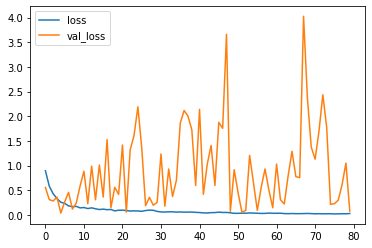

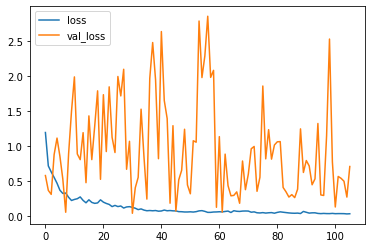

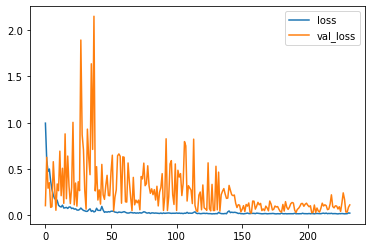

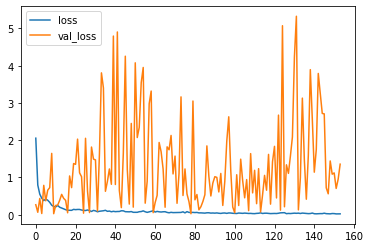

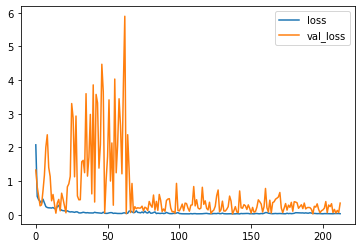

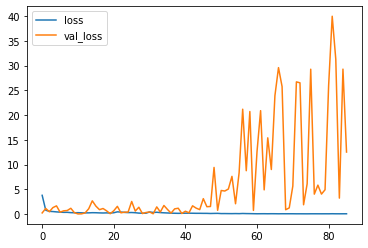

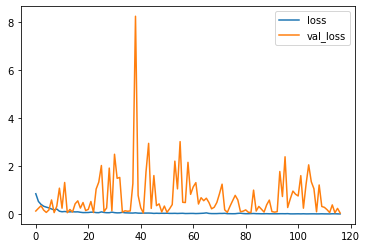

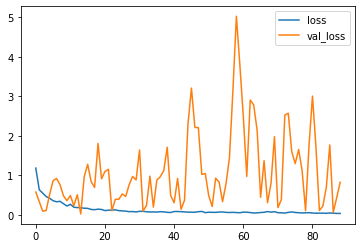

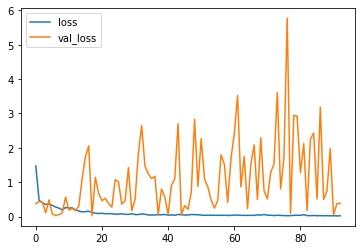

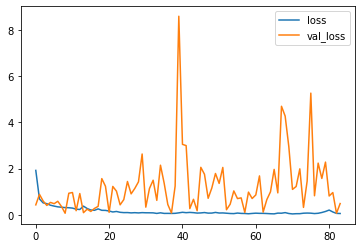

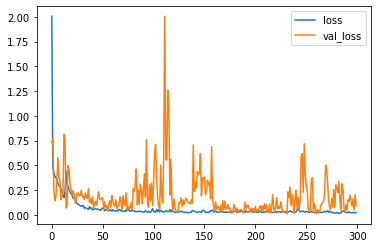

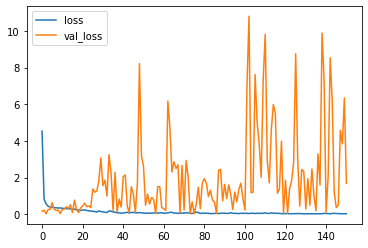

In [9]:
best_model = use_ml(find_best_parameters = True,
                    parametr_save = True,
                    epochs = 300,
                    checkpoint_use = False,
                    use_load_model = False,
                    directory_model = directory_model,
                    directory_result = directory_result,
                    )